In [57]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

### The Legion of Evil is the world's #2 most evil organization in the world, but we could be number one!
 Through tough negotiations and uncomfortable silences, we have been granted a meeting with the #1 most evil organization, the Legion of Doom! This is our chance, recruit, to make it to the big time. Let's not fail now!

#### Let's start by loading in our database and printing the head

In [58]:
marvel = pd.read_csv('./../../assets/datasets/marvel.csv')
print marvel.head()

   page_id                                 name  \
0     1678            Spider-Man (Peter Parker)   
1     7139      Captain America (Steven Rogers)   
2    64786  Wolverine (James \"Logan\" Howlett)   
3     1868    Iron Man (Anthony \"Tony\" Stark)   
4     2460                  Thor (Thor Odinson)   

                                   urlslug                ID  \
0              \/Spider-Man_(Peter_Parker)   Secret Identity   
1        \/Captain_America_(Steven_Rogers)   Public Identity   
2  \/Wolverine_(James_%22Logan%22_Howlett)   Public Identity   
3    \/Iron_Man_(Anthony_%22Tony%22_Stark)   Public Identity   
4                    \/Thor_(Thor_Odinson)  No Dual Identity   

                ALIGN         EYE        HAIR              SEX  GSM  \
0     Good Characters  Hazel Eyes  Brown Hair  Male Characters  NaN   
1     Good Characters   Blue Eyes  White Hair  Male Characters  NaN   
2  Neutral Characters   Blue Eyes  Black Hair  Male Characters  NaN   
3     Good Characters   

#### We have some extra data from our teams in the field about the comings and goings of our heroes in the list. Let's run this once and continue to the next field

In [59]:
def randomly(length):
    return np.random.randint(0, length, size = 1)[0]

def pull_unique(length, arr):
    this_rand = randomly(length)
    while this_rand in arr:
        this_rand = randomly(length)
    return this_rand

def make_week(number):
    return "Week: " + str(number)


columns = 35
weeks = [make_week(x + 1) for x in range(columns)]

activity = ["sleeping","jogging","general tcb(taking care of business)",
            "goat wrangling","birthday party","hopscotch tournament",
           "evil fighting","having conflicting emotions about secret identity",
           "ordering pizza","eating jellybeans","working both sides",
            "being john malkovich","Netflix and chill", "munching on granola",
            "standing silently on one leg", "using powers for good", 
            "extensive pullups","running into walls","creating portals to other dimensions",
           "being really really evil", "insulting children", "stealing puppies from orphanages",
           "masticating", "doing magic tricks", "understanding the world", "Space!!!"]

dicty = {}

for week in weeks:
    dicty[week] = [activity[randomly(len(activity))] for x in range(len(marvel))]

dicty['page_id'] = marvel['page_id']

#### Let's add our new data to a dataframe and print the head

In [60]:
weeks = pd.DataFrame(dicty)
weeks.head()

,Week: 1,Week: 10,Week: 11,Week: 12,Week: 13,Week: 14,Week: 15,Week: 16,Week: 17,Week: 18,...,Week: 33,Week: 34,Week: 35,Week: 4,Week: 5,Week: 6,Week: 7,Week: 8,Week: 9,page_id
0,stealing puppies from orphanages,working both sides,Space!!!,jogging,birthday party,extensive pullups,insulting children,working both sides,sleeping,goat wrangling,...,standing silently on one leg,using powers for good,goat wrangling,Space!!!,working both sides,working both sides,extensive pullups,doing magic tricks,sleeping,1678
1,hopscotch tournament,goat wrangling,stealing puppies from orphanages,understanding the world,insulting children,eating jellybeans,masticating,sleeping,being john malkovich,hopscotch tournament,...,doing magic tricks,using powers for good,Space!!!,hopscotch tournament,being really really evil,having conflicting emotions about secret identity,doing magic tricks,being really really evil,using powers for good,7139
2,munching on granola,understanding the world,sleeping,goat wrangling,having conflicting emotions about secret identity,working both sides,insulting children,running into walls,stealing puppies from orphanages,evil fighting,...,munching on granola,eating jellybeans,running into walls,standing silently on one leg,stealing puppies from orphanages,birthday party,being really really evil,jogging,being john malkovich,64786
3,having conflicting emotions about secret identity,stealing puppies from orphanages,Netflix and chill,hopscotch tournament,running into walls,using powers for good,creating portals to other dimensions,sleeping,extensive pullups,understanding the world,...,Space!!!,running into walls,Netflix and chill,birthday party,general tcb(taking care of business),goat wrangling,working both sides,creating portals to other dimensions,creating portals to other dimensions,1868
4,hopscotch tournament,being really really evil,Space!!!,goat wrangling,insulting children,evil fighting,standing silently on one leg,birthday party,masticating,being really really evil,...,Space!!!,extensive pullups,sleeping,Netflix and chill,being john malkovich,running into walls,hopscotch tournament,stealing puppies from orphanages,doing magic tricks,2460


#### Let's merge new this DataFrame with our marvel DataFrame

In [125]:
merged = pd.merge(marvel, weeks, how='inner', on='page_id')
print merged

       page_id                                               name  \
0         1678                          Spider-Man (Peter Parker)   
1         7139                    Captain America (Steven Rogers)   
2        64786                Wolverine (James \"Logan\" Howlett)   
3         1868                  Iron Man (Anthony \"Tony\" Stark)   
4         2460                                Thor (Thor Odinson)   
5         2458                         Benjamin Grimm (Earth-616)   
6         2166                          Reed Richards (Earth-616)   
7         1833                         Hulk (Robert Bruce Banner)   
8        29481                          Scott Summers (Earth-616)   
9         1837                         Jonathan Storm (Earth-616)   
10       15725                            Henry McCoy (Earth-616)   
11        1863                            Susan Storm (Earth-616)   
12        7823                         Namor McKenzie (Earth-616)   
13        2614                    

#### Let's take a look at our data to see how it came out. General Immortus tells you that "Ormond Wychwood" should be in our database, let's print out his data.

In [143]:
merged[merged['name'].str.contains('Ormond Wychwood')]
merged.columns.values

array(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'Year',
       'Week: 1', 'Week: 10', 'Week: 11', 'Week: 12', 'Week: 13',
       'Week: 14', 'Week: 15', 'Week: 16', 'Week: 17', 'Week: 18',
       'Week: 19', 'Week: 2', 'Week: 20', 'Week: 21', 'Week: 22',
       'Week: 23', 'Week: 24', 'Week: 25', 'Week: 26', 'Week: 27',
       'Week: 28', 'Week: 29', 'Week: 3', 'Week: 30', 'Week: 31',
       'Week: 32', 'Week: 33', 'Week: 34', 'Week: 35', 'Week: 4',
       'Week: 5', 'Week: 6', 'Week: 7', 'Week: 8', 'Week: 9'], dtype=object)

#### Everything looks good! Next, let's melt our table to find the most popular activity for our heroes by week

In [141]:
popact = pd.melt(merged, id_vars= merged.ix[:,:'Year'].columns.values, var_name='week', value_name='activity')
popact

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,week,activity
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0,Week: 1,stealing puppies from orphanages
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0,Week: 1,hopscotch tournament
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0,Week: 1,munching on granola
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0,Week: 1,having conflicting emotions about secret identity
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0,Week: 1,hopscotch tournament
5,2458,Benjamin Grimm (Earth-616),\/Benjamin_Grimm_(Earth-616),Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,NaN,Living Characters,2255.0,Nov-61,1961.0,Week: 1,birthday party
6,2166,Reed Richards (Earth-616),\/Reed_Richards_(Earth-616),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2072.0,Nov-61,1961.0,Week: 1,creating portals to other dimensions
7,1833,Hulk (Robert Bruce Banner),\/Hulk_(Robert_Bruce_Banner),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2017.0,May-62,1962.0,Week: 1,munching on granola
8,29481,Scott Summers (Earth-616),\/Scott_Summers_(Earth-616),Public Identity,Neutral Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1955.0,Sep-63,1963.0,Week: 1,being really really evil
9,1837,Jonathan Storm (Earth-616),\/Jonathan_Storm_(Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1934.0,Nov-61,1961.0,Week: 1,jogging


#### We are concerned about the activities of our valiant evil heroes vs. the unambitious good heroes. Let's print out a pivot table showing the differences. An example table can be found below.

In [64]:
goodvevil = pd.pivot_table(popact, values=('activity'), index=('name'), columns=['ALIGN'], aggfunc=len)
goodvevil

ALIGN,Bad Characters,Good Characters,Neutral Characters
name,,,
'Spinner (Earth-616),NaN,35.0,NaN
107 (Earth-616),NaN,NaN,35.0
11-Ball (Earth-616),35.0,NaN,NaN
115 (Legion Personality) (Earth-616),NaN,NaN,35.0
14 (Earth-616),35.0,NaN,NaN
181 (Legion Personality) (Earth-616),NaN,NaN,35.0
1X (Earth-616),NaN,35.0,NaN
2-D (Earth-616),NaN,35.0,NaN
2X (Earth-616),NaN,35.0,NaN


#### Are our freedom fighters better at being evil on average? Let's make a boxplot of the number of times each character had an evil action against how they are aligned (evil, neutral, good). You can see a sample of the plot we are looking for below this cell.

In [71]:
evil_activities = ["working both sides","creating portals to other dimensions",
           "being really really evil", "insulting children", "stealing puppies from orphanages"]


popact.index = popact['activity']
campareOne = popact.ix[evil_activities]

campare = pd.pivot_table(campareOne, values=('activity'), index=('name'), columns=['ALIGN'], aggfunc=len)

campare
#campare.plot(kind="box")
#plt.show()

ALIGN,Bad Characters,Good Characters,Neutral Characters
name,,,
'Spinner (Earth-616),NaN,6.0,NaN
107 (Earth-616),NaN,NaN,4.0
11-Ball (Earth-616),4.0,NaN,NaN
115 (Legion Personality) (Earth-616),NaN,NaN,3.0
14 (Earth-616),9.0,NaN,NaN
181 (Legion Personality) (Earth-616),NaN,NaN,5.0
1X (Earth-616),NaN,7.0,NaN
2-D (Earth-616),NaN,10.0,NaN
2X (Earth-616),NaN,8.0,NaN


![Box](./../../assets/plot_1.png "Box")

In [66]:
evil_activities = ["working both sides","creating portals to other dimensions",
           "being really really evil", "insulting children", "stealing puppies from orphanages"]

#### Now let's make a bar graph with pandas with the averages of the sum totals (evil / all activites) for our alignments. Which alignment on average was the most evil? Don't forget to give your chart a title and label your axis' recruits!

ALIGN     Bad Characters  Good Characters  Neutral Characters
activity        0.095294         0.066114            0.031325


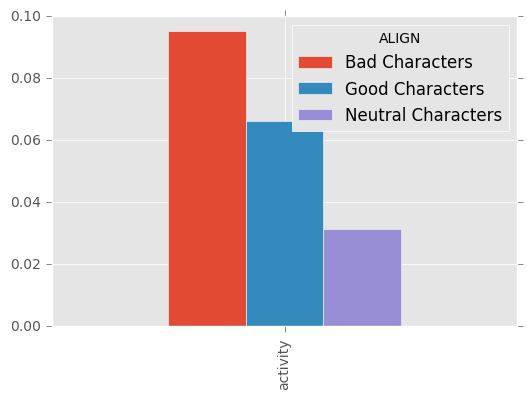

In [127]:
tot = pd.pivot_table(popact, values=['activity'], columns=['ALIGN'], aggfunc=len)
Total = float(tot['Good Characters'])+float(tot['Neutral Characters'])+float(tot['Bad Characters'])

evil = pd.pivot_table(campareOne, values=['activity'], columns=['ALIGN'], aggfunc=len)

evil['Good Characters'] = float(evil['Good Characters'])/ Total
evil['Neutral Characters'] = float(evil['Neutral Characters'])/ Total
evil['Bad Characters'] = float(evil['Bad Characters'])/ Total

print evil

evil.plot(kind='bar')
plt.show()

![Bar](./../../assets/plot_2.png "Bar")

#### Lex Luther ([Enterprising Leader of the Legion Of Doom](https://en.wikipedia.org/wiki/Legion_of_Doom_(DC_Comics)) has contracted you on one last personal project: To engineer a unique, cutting-edge slideshow for the lobby of the Legion of Doom! Here are the steps needed to complete the task.

* Replace each of your heroes activities with numbers denoting their alignment
    * 1 = good
    * -1 = evil
    * 0 = neutral (all activities not in good_activity or evil_activity lists)
* Pick a random hero from your dataset
* Plot his evilness/goodness over time with a line graph
* Make sure to print his name at the top of the graph and label your x and y axis!

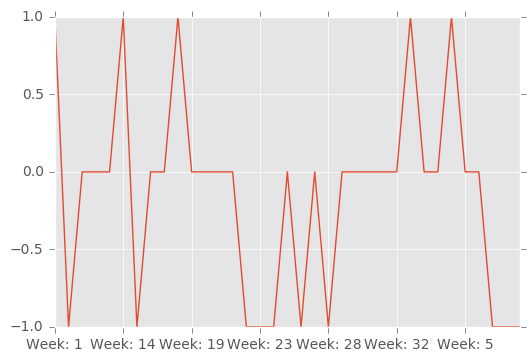

In [138]:

good_activity = ["birthday party","evil fighting",
                 "having conflicting emotions about secret identity",
           "using powers for good", "understanding the world", "Space!!!"]

evil_activities = ["working both sides","creating portals to other dimensions",
           "being really really evil", "insulting children", "stealing puppies from orphanages"]



activities = merged.ix[3,'Week: 1':]
almostNeut = [i for i in activities if i not in good_activity]
Neut = [i for i in activities if i not in evil_activities]

activities.replace(good_activity, 1, inplace = True)
activities.replace(evil_activities, -1, inplace = True)
activities.replace(Neut, 0, inplace = True)
activities = np.transpose(activities)

activities.plot()
plt.show()
#print activities
#activities.ix[good_activity] = activities[]


![Bar](./../../assets/plot_3.png "Bar")